# Welcome to my Kernal

Hi Kaggler,

We will do some Explorations through the BigMart's sales data to understand their distribuitions and patterns and finally we will predict the sales price

I have kept the kernal as basic as possible to understand the details clearly. 

Look for another interesting Kernels on [Kaggle](https://www.kaggle.com/harshalnikose)

Please go through presentation uploaded on [GitHub](https://github.com/HarshalNikose/BigMart-Sales-Forecast.git)

I'll appreciate your feedback and if you like this kernel, votes up!

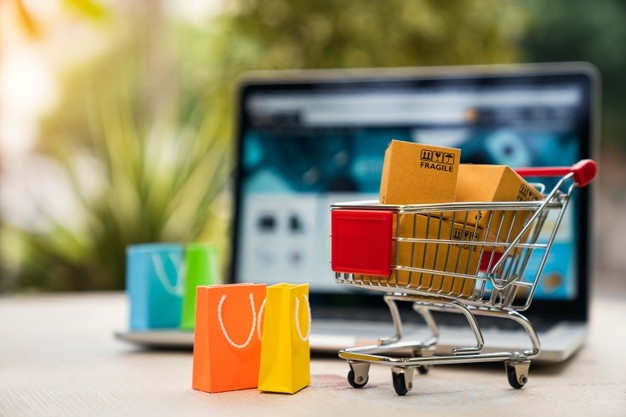

# Introduction

This notebook analyzes customer behavior for that we have BigMarts Sales data collected in 2013 which is bifurcated in train (8523 records & 12 attributes) and test (5681 records & 11 attributes) data set, train data set has both independant and dependant variable(s) given below

* Item_Identifier: Product ID
* Item_Weight: Weight of Product
* Item_Fat_Content: Fat content of Product- Low/Regular
* Item_Visibility: Parameter to know the visiblity/reach of product
* Item_Type: Category of Product
* Item_MRP: Maximum Retail Price of the Product
* Outlet_Identifier: Store ID
* Outlet_Establishment_Year: The Year in which store is established
* Outlet_Size: Areawise distribution of Stores- Low/Medium/High
* Outlet_Location_Type: Type of city in which outlet is located
* Outlet_Type: Type of outlet - Grocery store or supermarket
* Item_Outlet_Sales: Sale price of product - The dependant variable to be predicted

# The Hypothesis

1. Locality: Outlet in populated locality should generate more revenue

2. Spending Capacity: Tier 1 should have more spending capacity than tier 2 and tier 3

3. Product Selection: Tier 1 should prefer low fat content food as they tend to be more aware of their health

4. Item Visiblity: More visible Item should have more revenue generating power

5. Area: Stores which have early establishment could have higher outlet size

6. MRP: Consumers prefer reasonable product or Branded products

# Problem Statment

We need to analyse the dataset and come up with more insights and our main objective is to predict the Sales figure for the test dataset

# Approach

1. By applying Exploratory Data Analysis we will identify the relation between different attributes and evaluate meaningful information

2. By applying different supervised machine learning algorithms we will predict the sales for test dataset

# Aim of the Project

The main objective is to find the sales per product for each store and evaluate meaningful insights. Using this model, BigMart will try to understand different attributes of the product and apply them to increase their overall sales

# Part 1: Data Preprocessing

## Importing the Librabies and Dataset

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings# warning filter

#ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('husl')

#feature engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#train test split
from sklearn.model_selection import train_test_split


#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS


#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso


#default theme and settings
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)
pd.options.display.max_columns

#warning hadle
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

## Display all the columns of the dataframe
pd.pandas.set_option('display.max_columns',None)

## Display all the rows of the dataframe
#pd.pandas.set_option('display.max_rows',None)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
## loading the train dataset
dataset = pd.read_csv('../input/bigmart-sales-data/Train.csv')


## print shape of dataset with rows and columns
print(dataset.shape)

## Data Exploration

In [ ]:
dataset.head()

In [ ]:
# check the columns
dataset.columns

In [ ]:
# check the information about the dataset
dataset.info()

In [ ]:
# Check the name of coloumns which contain string
dataset.select_dtypes(include='object').columns

In [ ]:
# Check the no. of coloumns which contain string
len(dataset.select_dtypes(include='object').columns)

In [ ]:
# Check the name of coloumns which contain numerical value
dataset.select_dtypes(include=['int64', 'float64']).columns


In [ ]:
# Check the no. of coloumns which contain numerical value
len(dataset.select_dtypes(include=['int64', 'float64']).columns)

In [ ]:
# statistical summary
dataset.describe()

## Dealing with missing data

In [ ]:
dataset.isnull().values.any()

In [ ]:
dataset.isnull().values.sum()

In [ ]:
dataset.isnull().sum()

In [ ]:
# columns with null values
dataset.columns[dataset.isnull().any()]

In [ ]:
len(dataset.columns[dataset.isnull().any()])

In [ ]:
# null values with heatmap
plt.figure(figsize=(16,9))
sns.heatmap(dataset.isnull())
plt.show()

In [ ]:
null_percent = dataset.isnull().sum() / dataset.shape[0] * 100

# (missing values / total values) * 100

null_percent

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot('Item_Weight',data=dataset)

**Box Plot suggest we dont have any outlier and hence we can change missing values with 'Mean'**

In [ ]:
dataset['Item_Weight'] = dataset['Item_Weight'].fillna(dataset['Item_Weight'].mean())

Since the Outlet_Size is a categorial variable we can change this missing values to "Mode"(Most Repeated Value)

In [ ]:
dataset['Outlet_Size'] = dataset['Outlet_Size'].fillna(dataset['Outlet_Size'].mode()[0])

In [ ]:
dataset.isnull().values.any()

In [ ]:
len(dataset.columns[dataset.isnull().any()])

## Cleaning the Data

In [ ]:
dataset['Item_Identifier'].value_counts()

In [ ]:
dataset['Item_Fat_Content'].value_counts()

Some of ‘Low Fat’ values mis-coded as ‘low fat’ and ‘LF’. Also, some of ‘Regular’ are mentioned as ‘regular’. We need to fix them

In [ ]:
dataset['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace = True)

In [ ]:
dataset['Item_Fat_Content'].value_counts()

In [ ]:
dataset['Item_Type'].value_counts()

In [ ]:
dataset['Outlet_Identifier'].value_counts()

In [ ]:
dataset['Outlet_Size'].value_counts()

In [ ]:
dataset['Outlet_Location_Type'].value_counts()

In [ ]:
dataset['Outlet_Type'].value_counts()

*We will convert "Outlet_Establishment_Year" to Age of the Store to get more meaning from the data*

In [ ]:
dataset['Years_Established'] = dataset['Outlet_Establishment_Year'].apply(lambda x: 2021 - x) 
dataset = dataset.drop(columns=['Outlet_Establishment_Year'])
dataset.head()

# Part 2: Exploratory Data Analysis

## A] Univariate Analysis

In [ ]:
# Check the name of coloumns which contain string
dataset.select_dtypes(include='object').columns

### 1) Item Fat Content

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=dataset,palette='Set1')

Observation: People bought more Low Fat Items

### 2) Item Type

In [ ]:
plt.figure(figsize=(24,8))
sns.countplot('Item_Type',data=dataset,palette='twilight')

Observation: People bought more Fruits and Vegetables

### 3) Outlet Size

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Size',data=dataset,palette='Set2')

Observation: We have more Medium Outlets

### 4) Outlet Location

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Location_Type',data=dataset,palette='ocean')

Observation: Maximum outlets in Tier 3 cities

### 5) Outlet Type

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=dataset,palette='spring')

Observation: Maximum supermarket are of Type 1

## B] Bivariate Analysis

In [ ]:
# Check the name of coloumns which contain string
dataset.select_dtypes(include='object').columns

### 1) Item Fat Content to Item Outlet Sales

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot('Item_Fat_Content','Item_Outlet_Sales',data=dataset,palette='summer')

Observation: Low Fat and Regular both are contributing equally to the revenue generation

### 2) Item Visiblity to Item Outlet Sales

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter('Item_Visibility','Item_Outlet_Sales',data=dataset)

Observation: Here we have intresting ovservation, where the visiblity of Items is Zero, which suggest those items kept behind in shelf and amlost have no visiblity can also be sold. This show Consumer tend to search for their own products

### 3) Item Type to Item Outlet Sales

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=dataset,palette='spring')

Observation: Although Fruits and Vegetables unit sold are high, however revenue generated by Seafood is much higher, so we have to focus more on such products

### 4) Item MRP to Item Outlet Sales

In [ ]:
plt.figure(figsize=(8,5))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=dataset)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

Observation: Items with higher MRP are sold maximum

### 5) Outlet Size to Item Outlet Sales

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=dataset,palette='mako')

Observation: Medium and High size outlet have maximum revenue generation power

### 6) Outlet Location to Item Outlet Sales

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=dataset,palette='autumn')

Observation: Tier 2 & 3 have more revenue generation power although we have maximum number ot outlet in Tier 3 cities so it justify the number

## C] Multivariate Analysis

### 1) Item Type by Item Fat Content to Item Outlet Sales

In [ ]:
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=dataset,palette='Set1')
plt.legend()

Observation: Mostly we have equal revenue generation from Fat and Regular Food Items

### 2) Outlet Location Type by Outlet Type to Item Outlet Sales

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=dataset,palette='mako')
plt.legend()

Observation: Here we have intresting ovservation, where the visiblity of Items is Zero, which suggest those items kept behind in shelf and almost have no visiblity can also be sold. This show Consumer tend to search for their own products

## Distplot

In [ ]:
# distplot of the target variable

plt.figure(figsize=(16,9))
bar = sns.distplot(dataset['Item_Outlet_Sales'])
bar.legend(["Skewness: {:.2f}".format(dataset['Item_Outlet_Sales'].skew())])
plt.show()

## Correlation matrix

In [ ]:
dataset_2 = dataset.drop(columns='Item_Outlet_Sales')

In [ ]:
dataset_2.shape

In [ ]:
dataset_2.corrwith(dataset['Item_Outlet_Sales']).plot.bar(
    figsize=(16,9), title='Correlated with SalePrice', grid=True
)

In [ ]:
# heatmap
plt.figure(figsize=(9, 9))
ax = sns.heatmap(data=dataset.corr(), cmap='coolwarm', annot=True, linewidths=2)

# Part 3) Feature Enginering

## Label Encoding

In [ ]:
#feature engineering
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['Outlet_Identifier','Item_Type']

for i in var_mod:
    dataset[i] = le.fit_transform(dataset[i])
    

In [ ]:
dataset.head()

## One Hot Encoding

In [ ]:
dataset = dataset.drop(columns=['Item_Identifier'])
dataset.head()

In [ ]:
#feature engineering
from sklearn.preprocessing import OneHotEncoder

In [ ]:
dataset = pd.get_dummies(data=dataset, drop_first=True)
dataset.shape

In [ ]:
dataset.head()

## Removing Skewness

Skewness in variables is undesirable for predictive modeling. Some machine learning methods assume normally distributed data and a skewed variable can be transformed by taking its log, square root, or cube root so as to make its distribution as close to normal distribution as possible. In our data, variables Item_Visibility is highly skewed. So, we will treat skewness with the help of log transformation.

In [ ]:
#dataset['Item_Visibility'] = np.log(dataset['Item_Visibility'])

In [ ]:
#dataset.head()

*Skewness not taken into account as it was hindering the performance*

## Splitting the dataset

In [ ]:
# independ variables / matrix of features
x = dataset.drop(columns='Item_Outlet_Sales')

In [ ]:
# target variable / dependent variable
y = dataset['Item_Outlet_Sales']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
x_train.shape

In [ ]:
y_train.shape

In [ ]:
x_test.shape

In [ ]:
y_test.shape

## Feature scaling

In [ ]:
features= ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Years_Established']

# Part 4: Building the model

In [ ]:
#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

In [ ]:
#ML models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRFRegressor
from sklearn.linear_model import Ridge

In [ ]:
def cross_val(model_name,model,x,y,cv):
    
    scores = CVS(model, x, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

## 1) Multiple Linear Regressor

In [ ]:
#ML model
from sklearn.linear_model import LinearRegression

#model
regressor_mlr = LinearRegression()

#fit
regressor_mlr.fit(x_train, y_train)

#predict
y_pred = regressor_mlr.predict(x_test)

#score variables
LR_MAE = round(MAE(y_test, y_pred),2)
LR_MSE = round(MSE(y_test, y_pred),2)
LR_R_2 = round(R2(y_test, y_pred),4)
LR_CS  = round(CVS(regressor_mlr, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LR_MAE}\n")
print(f" Mean Squared Error: {LR_MSE}\n")
print(f" R^2 Score: {LR_R_2}\n")
cross_val(regressor_mlr,LinearRegression(),x,y,5)

In [ ]:
Linear_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Linear_Regression.to_csv("Linear Regression.csv")  

## 2) Random Forest Regressor

In [ ]:
#ML model
from sklearn.ensemble import RandomForestRegressor

#model
regressor_rf = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=101)

#fit
regressor_rf.fit(x_train, y_train)

#predict
y_pred = regressor_rf.predict(x_test)

#score variables
RFR_MAE = round(MAE(y_test, y_pred),2)
RFR_MSE = round(MSE(y_test, y_pred),2)
RFR_R_2 = round(R2(y_test, y_pred),4)
RFR_CS  = round(CVS(regressor_rf, x, y, cv=5).mean(),4)



print(f" Mean Absolute Error: {RFR_MAE}\n")
print(f" Mean Squared Error: {RFR_MSE}\n")
print(f" R^2 Score: {RFR_R_2}\n")
cross_val(regressor_rf,RandomForestRegressor(),x,y,5)

In [ ]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")  

## 3) Lasso Regressor

In [ ]:
#ML model
from sklearn.linear_model import Lasso

#model
regressor_ls = Lasso(alpha = 0.05)
#fit
regressor_ls.fit(x_train,y_train)

#predict
y_pred = regressor_ls.predict(x_test)

#score variables
LS_MAE = round(MAE(y_test, y_pred),2)
LS_MSE = round(MSE(y_test, y_pred),2)
LS_R_2 = round(R2(y_test, y_pred),4)
LS_CS  = round(CVS(regressor_ls, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {LS_MAE}\n")
print(f" Mean Squared Error: {LS_MSE}\n")
print(f" R^2 Score: {LS_R_2}\n")
cross_val(regressor_ls,Lasso(alpha = 0.05),x,y,5)

In [ ]:
Lasso_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Lasso_Regressor.to_csv("Lasso Regressor.csv")    

## 4) XGBoost Regressor

In [ ]:
#ML model
from xgboost import XGBRFRegressor

#model
regressor_xgb = XGBRFRegressor()

#fit
regressor_xgb.fit(x_train, y_train)

#predict
y_pred = regressor_xgb.predict(x_test)

#score variables
XGB_MAE = round(MAE(y_test, y_pred),2)
XGB_MSE = round(MSE(y_test, y_pred),2)
XGB_R_2 = round(R2(y_test, y_pred),4)
XGB_CS  = round(CVS(regressor_xgb, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {XGB_MAE}\n")
print(f" Mean Squared Error: {XGB_MSE}\n")
print(f" R^2 Score: {XGB_R_2}\n")
cross_val(regressor_xgb,XGBRFRegressor(alpha = 0.05),x,y,5)

In [ ]:
XGBoost_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
XGBoost_Regressor.to_csv("XGBoost Regressor.csv") 

## 5) Ridge Regressor

In [ ]:
#ML model
from sklearn.linear_model import Ridge

#model
regressor_rd = Ridge(normalize=True)
#fit
regressor_rd.fit(x_train,y_train)

#predict
y_pred = regressor_ls.predict(x_test)

#score variables
RD_MAE = round(MAE(y_test, y_pred),2)
RD_MSE = round(MSE(y_test, y_pred),2)
RD_R_2 = round(R2(y_test, y_pred),4)
RD_CS  = round(CVS(regressor_rd, x, y, cv=5).mean(),4)

print(f" Mean Absolute Error: {RD_MAE}\n")
print(f" Mean Squared Error: {RD_MSE}\n")
print(f" R^2 Score: {RD_R_2}\n")
cross_val(regressor_rd,Ridge(normalize=True),x,y,5)

In [ ]:
Ridge_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_pred})
Ridge_Regressor.to_csv("Ridge Regressor.csv")  

# Conclusion

In [ ]:
MAE= [LR_MAE,RFR_MAE,LS_MAE,XGB_MAE,RD_MAE]
MSE= [LR_MSE,RFR_MSE,LS_MSE,XGB_MSE,RD_MSE]
R_2= [LR_R_2,RFR_R_2,LS_R_2,XGB_R_2,RD_R_2]
Cross_score= [LR_CS,RFR_CS,LS_CS,XGB_CS,RD_CS]

Models = pd.DataFrame({
    'Models': ["Linear Regression","Random Forest Regressor","Lasso Regressor","XGBoost Regressor","Ridge Regressor"],
    'MAE': MAE, 'MSE': MSE, 'R^2':R_2, 'Cross Validation Score':Cross_score})
Models.sort_values(by='MAE', ascending=True)

# Realizations

1. XGBoost Regressor and Random Forest are best performing Models, we can use both to check on test data set and find out which perform better
2. MRP has huge correlation with the Outlet Sales
3. For better performance we need parameter tuning after selecting the suitable model

Some Defination:

a) R-Squared: R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

If the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

b) MAE and MSE: MAE : The mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. MSE : The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.

c) RMSE: RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

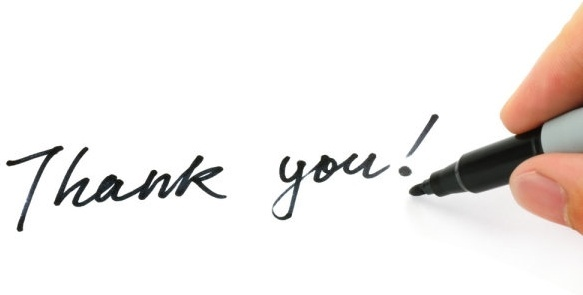